# 2024 Retail Operating Efficiency Analysis


#### 1. Objective
This analysis evaluates the operational efficiency of major U.S. retail companies in 2024 by examining accounts receivable turnover, inventory turnover, and accounts payable turnover. It calculates and compares each company's Operating Cycle and Cash Conversion Cycle (CCC) to reveal differences in working capital management, supply chain efficiency, and cash flow strategy.

#### 2. Key Metrics
- DSO (Days Sales Outstanding): Average number of days to collect payment after a sale; lower values indicate faster collections.
- DOH (Days of Inventory on Hand): Average number of days inventory is held before being sold; lower values indicate faster inventory turnover.
- DPO (Days Payable Outstanding): Average number of days to pay suppliers; higher values indicate slower cash outflow.
- Operating Cycle = DSO + DOH: Measures total time from investment in inventory to cash collection.
- Cash Conversion Cycle (CCC) = Operating Cycle – DPO: Measures the net time cash is tied up in operations; shorter (or negative) values indicate stronger liquidity.

#### 3. Key Findings
- Negative CCC Leaders:
    - Wayfair (-42.66 days) and Amazon (-35.56 days) extend DPO significantly (54.95 days and 105.56 days respectively), meaning they can collect from customers before paying suppliers—effectively funding operations with supplier capital.
    - This model is typical for platform-based or cash flow–optimized e-commerce businesses.

- High CCC Companies:
    - Ulta (70.84 days) and Macy’s (48.13 days) have longer cash tie-up periods, largely due to slow inventory turnover (DOH = 93.15 days for Ulta, 111.91 days for Macy’s), creating higher working capital demands.

- Industry Median Performance:
    - Large brick-and-mortar retailers like Walmart, Target, and Costco maintain CCC in the 0–10 day range, showing balanced supply chain and cash flow management.

- Extreme Inventory Strategies:
    - Wayfair holds minimal inventory (DOH = 3.35 days), relying heavily on supplier drop-shipping.
    - Macy holds inventory over 111 days, likely driven by seasonal merchandise and department store product mix.

#### 4. Business Implications
- Negative CCC Advantage: Enables growth or reinvestment using supplier capital but requires strong supplier negotiation power.
- Inventory Risk: High DOH increases cash lock-up and the risk of obsolescence, requiring tighter inventory management.
- Receivables & Payables Strategy: Coordinating DSO and DPO effectively can significantly improve CCC and liquidity.


In [35]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
def get_financials(ticker: str, company_name: str):
    """
    Fetch and merge balance sheet, income statement, and cashflow data from Yahoo Finance.
    """
    ticker_obj = yf.Ticker(ticker)

    df_bs = ticker_obj.balance_sheet.T.reset_index(names='Date')
    df_is = ticker_obj.financials.T.reset_index(names='Date')
    df_cf = ticker_obj.cashflow.T.reset_index(names='Date')

    df_10k = df_bs.merge(df_is, on='Date').merge(df_cf, on='Date')
    df_10k['CompanyName'] = company_name

    return df_10k

In [40]:
def calculate_efficiency_ratio(df: pd.DataFrame) -> pd.DataFrame:
    """
    Calculate efficiency ratios: AR turnover, Inventory turnover, AP turnover,
    DSO, DOH, DPO, Operating Cycle, Cash Conversion Cycle.
    """
    temp_df = pd.DataFrame()
    temp_df['Year'] = df['Date'].dt.year.astype(int)
    temp_df['Name'] = df['CompanyName']

    if 'Account Receivable' in df.columns:
        temp_df['AR_Turnover'] = df['Total Revenue'] / df['Accounts Receivable']
    else:
        temp_df['AR_Turnover'] = df['Total Revenue'] / df['Receivables']

    temp_df['Inventory_Turnover'] = df['Cost Of Revenue'] / df['Inventory']
    temp_df['AP_Turnover'] = df['Cost Of Revenue'] / df['Accounts Payable']

    temp_df['DSO'] = 365 / temp_df['AR_Turnover']
    temp_df['DOH'] = 365 / temp_df['Inventory_Turnover']
    temp_df['DPO'] = 365 / temp_df['AP_Turnover']

    temp_df['Operating_Cycle'] = temp_df['DSO'] + temp_df['DOH']
    temp_df['Cash_Conversion_Cycle'] = temp_df['Operating_Cycle'] - temp_df['DPO']

    return temp_df

In [41]:
# Dictionary of companies to analyze
dic_company = {
    'COST': 'Costco',
    'WMT': 'Walmart',
    'TGT': 'Target',
    'BJ': 'BJ Wholesale',
    'KR': 'Kroger',
    'HD': 'Home Depot',
    'M': 'Macy',
    'DG': 'Dollar General',
    'AMZN': 'Amazon',
    'CHWY': 'Chewy',
    'W': 'Wayfair',
    'TJX': 'TJ Maxx',
    'ROST': 'Ross',
    'ULTA': 'Ulta'
}

In [42]:
# Collect data and calculate ratios
eff_analysis = pd.DataFrame()

for ticker, name in dic_company.items():
    df = get_financials(ticker=ticker, company_name=name)
    ratio = calculate_efficiency_ratio(df)
    eff_analysis = pd.concat([eff_analysis, ratio], ignore_index=True)

# Filter for 2024
eff_analysis_2024 = eff_analysis[eff_analysis['Year'] == 2024].reset_index(drop=True)
eff_analysis_2024

,Year,Name,AR_Turnover,Inventory_Turnover,AP_Turnover,DSO,DOH,DPO,Operating_Cycle,Cash_Conversion_Cycle
0,2024,Costco,93.514517,11.924599,11.449359,3.903137,30.608995,31.879514,34.512133,2.632619
1,2024,Walmart,73.684061,8.929206,8.627438,4.953581,40.877093,42.306882,45.830674,3.523792
2,2024,Target,76.504274,6.547871,6.433129,4.770975,55.743306,56.737549,60.514281,3.776732
3,2024,BJ Wholesale,85.056754,11.222080,13.797339,4.291252,32.525164,26.454377,36.816417,10.362040
4,2024,Kroger,70.242978,16.421534,11.239283,5.196249,22.226912,32.475380,27.423161,-5.052219
5,2024,Home Depot,45.874099,4.848827,10.133406,7.956560,75.275934,36.019477,83.232494,47.213017
6,2024,Macy,81.453925,3.261637,5.347368,4.481061,111.906988,68.257874,116.388049,48.130175
7,2024,Dollar General,344.654549,3.856385,7.518755,1.059031,94.648217,48.545273,95.707249,47.161976
8,2024,Amazon,11.504914,9.536681,3.457796,31.725573,38.273274,105.558571,69.998847,-35.559724
9,2024,Chewy,72.367586,11.103158,7.227725,5.043695,32.873529,50.499987,37.917224,-12.582764


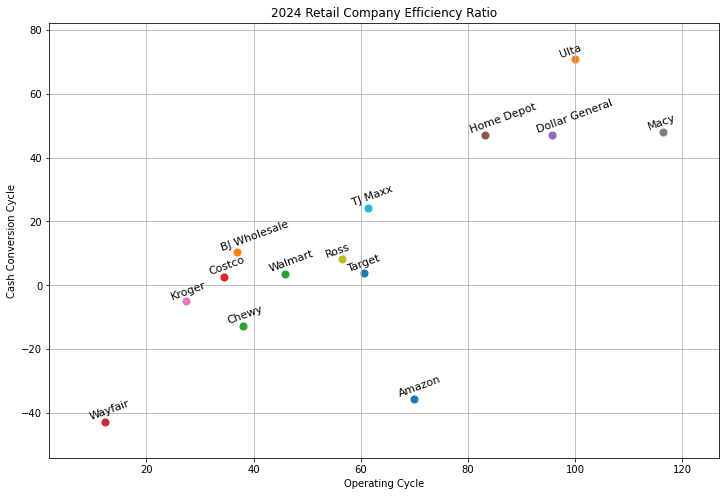

In [43]:
fig, axs = plt.subplots(figsize=(12,8))

for company, grp in eff_analysis_2024.groupby('Name'):
    x = grp['Operating_Cycle'].values[0]
    y = grp['Cash_Conversion_Cycle'].values[0]
    axs.scatter(x, y , s=50)

# Adjust the frame
xmin, xmax = eff_analysis_2024['Operating_Cycle'].min(), eff_analysis_2024['Operating_Cycle'].max()
ymin, ymax = eff_analysis_2024['Cash_Conversion_Cycle'].min(), eff_analysis_2024['Cash_Conversion_Cycle'].max()

# Add more space
x_padding = (xmax - xmin) * 0.1
y_padding = (ymax - ymin) * 0.1
axs.set_xlim(xmin - x_padding, xmax + x_padding)
axs.set_ylim(ymin - y_padding, ymax + y_padding)

for company, grp in eff_analysis_2024.groupby('Name'):
    x = grp['Operating_Cycle'].values[0]
    y = grp['Cash_Conversion_Cycle'].values[0]
    axs.annotate(company, (x, y),
                 textcoords="offset points",
                 xytext=(-17, 2),
                 ha='left',
                 rotation=20,
                 fontsize=11)

axs.set_title('2024 Retail Company Efficiency Ratio')
axs.set_xlabel('Operating Cycle')
axs.set_ylabel('Cash Conversion Cycle')
axs.grid(True)

plt.show()